# About Author:-
- Name: Moshin Shareef.
- [Email](mohsinshareef822@gmail.com)
- [Github](https://github.com/MohsinShareef/Exploratory-Data-Analysis-Projects)
- [Kaggle](https://www.kaggle.com/mohsin31202)
- Project: Student Study Performance.
- Submision Date: March 2024.

## About Data:-
- Data Owner: Bhavik Jikadara
### Problem Statement:
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### Content
- This data set consists of the marks secured by the students in various subjects.

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## Import LibrariesL-
- Pandas
- Numpy
- Matplotlib
- Seaborn
## Version:-
- Python 3.11.5

In [91]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# display all columns
pd.pandas.set_option('display.max_columns', None)
# display all rows
pd.pandas.set_option('display.max_rows', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# load data online
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## Load the daataset 
- create dataframe(df).
- Store data in variable df.

In [92]:
# Load data online
#df = pd.read_csv('/kaggle/input/student-study-performance/study_performance.csv')
# load data locally
df = pd.read_csv('./data/study_performance.csv')

# Let's Start Data Wrangling
- Look first five rows

In [93]:
# Get head of the data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
# Get the shape of the dataset
df.shape

(1000, 8)

In [95]:
# Get the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [96]:
# Summary of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [97]:
# Columns in the dataset
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Obervation Set 1:-
- Data set have 8 columns.
- Data set have 1000 rows.
- 3 columns are Interger data type.
- 5 columns are Object data type.
- Columms name are following:
  - ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
  - 'test_preparation_course', 'math_score', 'reading_score',
  - 'writing_score']

# Check missing values of this dataset

In [98]:
# Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

- This data set have no missing value
- we are good to go 

## Check the duplicates values

In [99]:
# Duplicates
df.duplicated().sum()

0

- This data set have no duplicate values
- we are good to go 

# Let's Start Exploratory Data Analysis.
- Find the hidden insighs of data
- Explore column by column

In [100]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [101]:
print(df['race_ethnicity'].unique())
print(df['race_ethnicity'].nunique())

['group B' 'group C' 'group A' 'group D' 'group E']
5


In [102]:
print(df['parental_level_of_education'].unique())
print(df['parental_level_of_education'].nunique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
6


In [103]:
print(df['lunch'].unique())
print(df['lunch'].nunique())

['standard' 'free/reduced']
2


In [104]:
print(df['test_preparation_course'].unique())
print(df['test_preparation_course'].nunique())

['none' 'completed']
2


### Obervation Set 2:-
- Check the parental_level_of_education column.
- This column have high school or same high school values.
- explore this column.

In [105]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [106]:
df[df['parental_level_of_education']== 'some high school'].head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
15,female,group C,some high school,standard,none,69,75,78
17,female,group B,some high school,free/reduced,none,18,32,28
23,female,group C,some high school,standard,none,69,73,73
37,female,group D,some high school,free/reduced,none,50,64,59
54,female,group C,some high school,free/reduced,completed,71,84,87
59,female,group C,some high school,free/reduced,none,0,17,10
61,male,group A,some high school,free/reduced,none,39,39,34
64,female,group D,some high school,standard,none,59,58,59
65,male,group B,some high school,standard,none,67,64,61
66,male,group D,some high school,free/reduced,none,45,37,37


In [107]:
df[df['parental_level_of_education']== 'high school'].head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
12,female,group B,high school,standard,none,65,81,73
16,male,group C,high school,standard,none,88,89,86
20,male,group D,high school,standard,none,66,69,63
28,male,group C,high school,standard,none,70,70,65
47,female,group C,high school,standard,none,66,71,76
49,male,group C,high school,standard,completed,82,84,82
53,male,group D,high school,standard,none,88,78,75
55,female,group C,high school,free/reduced,none,33,41,43


- Convert the some high school to high school

In [108]:
# some high school replace with high school
df['parental_level_of_education'] = df['parental_level_of_education'].replace('some high school', 'high school')

In [109]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
high school           375
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### Obervation Set 3:-
- Create new column `Total Number`.
- Add `math_score`, `reading_score`, and `writing_score`.
- Create another new column `Average`
- Show the average of `math_scoure`, `reading_score` and `writing_score`.

In [110]:
df['total_number'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_number']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_number,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Let's start find the patterns and insight

### Q1. who dominate in this data set male or female?
### Q2. `In race_ethnicity` which group is high contribution?
### Q3. Check the Parents level of education?
### Q4. How many student take standard `lunch`?
### Q5. How many student complete test preparation?
### Q6. Test numbers base on the parental level of education?
### Q7- Can Parental level of education effect on children score?
### Q8. Test numbers base on `race/ethnicity`?
### Q9. Can `race/ethnicity` effect on student score?
### Q10. How many student's take full marks, check math, writing and reading test?
### Q11. How many student's take less then 20 marks, check math, writing and reading test?
### Q12. How many student's take zero  marks, check math, writing and reading test?
### Q13. Who's take more numbers male or female?
### Q14. Which group top of the score base on `race_ethnicity`? 
### 15. Which group top on average base on `parental_level_of_education`

### Q1. who dominate in this data set male or female?

    count  count
0  female    518
1    male    482


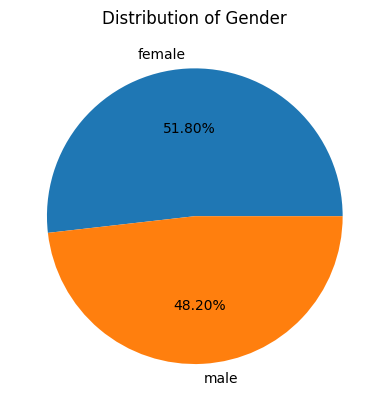

In [111]:
count_gender = df['gender'].value_counts()
print(count_gender.reset_index().rename(columns = {'index':'gender', 'gender':'count'}))
# make pie chart
plt.pie(count_gender, labels = count_gender.index, autopct = '%.2f%%')
plt.title('Distribution of Gender')
plt.show()

<center><b>Figure:1 </b> -Female more then Male.</center>

### Q2. In `race_ethnicity` which group is high contribution?

  Race_Ethnicity  count
0        group C    319
1        group D    262
2        group B    190
3        group E    140
4        group A     89


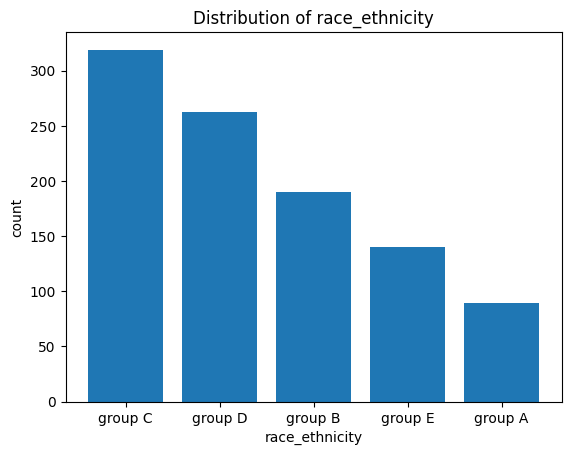

In [112]:
# Value counts of race_ethnicity
count_race_ethnicity = df['race_ethnicity'].value_counts()
print(count_race_ethnicity.reset_index().rename(columns = {'index':'race_ethnicity', 'race_ethnicity':'Race_Ethnicity'}))
# Create bar chart
plt.bar(count_race_ethnicity.index, count_race_ethnicity)
plt.title('Distribution of race_ethnicity')
plt.xlabel('race_ethnicity')
plt.ylabel('count')
plt.show()

<center><b>Figure:2 </b>- Group C is highest group.</center>

### Q3. Check the Parents level of education?

  Parental_Level_of_Education  count
0                 high school    375
1                some college    226
2          associate's degree    222
3           bachelor's degree    118
4             master's degree     59


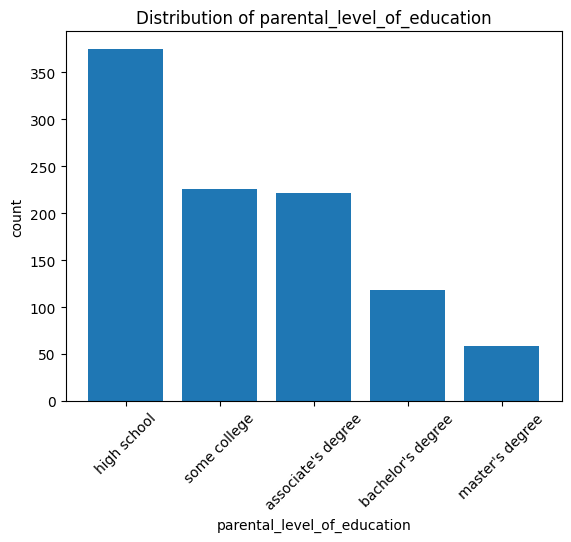

In [113]:
# Value counts of parental_level_of_education
count_parental_level_of_education = df['parental_level_of_education'].value_counts()
print(count_parental_level_of_education.reset_index().rename(columns = {'index':'parental_level_of_education', 'parental_level_of_education':'Parental_Level_of_Education'}))
# Create bar chart
plt.bar(count_parental_level_of_education.index, count_parental_level_of_education)
plt.title('Distribution of parental_level_of_education')
plt.xlabel('parental_level_of_education')
plt.ylabel('count')
plt.xticks(rotation = 45)
plt.show()

<center><b>Figure:3</b> -Parents education level.</center>

### Q4. How many student take standard `lunch`?

          Lunch  count
0      standard    645
1  free/reduced    355


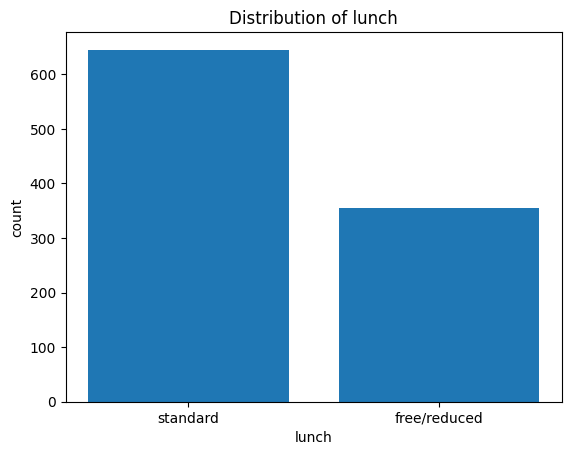

In [114]:
# Value counts of lunch
count_lunch = df['lunch'].value_counts()
print(count_lunch.reset_index().rename(columns = {'index':'lunch', 'lunch':'Lunch'}))
# Create bar chart
plt.bar(count_lunch.index, count_lunch)
plt.title('Distribution of lunch')
plt.xlabel('lunch')
plt.ylabel('count')
plt.show()

<center><b>Figure:4</b> -Standard group is highest group.</center>

### Q5. How many student complete test preparation?

  Test_Preparation_Course  count
0                    none    642
1               completed    358


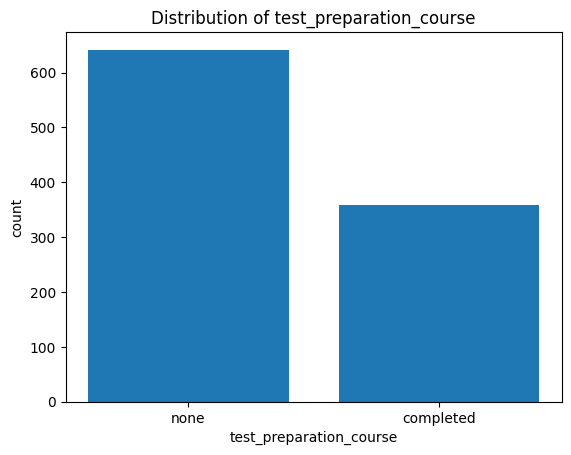

In [115]:
# Value counts of test_preparation_course
count_test_preparation_course = df['test_preparation_course'].value_counts()
print(count_test_preparation_course.reset_index().rename(columns = {'index':'test_preparation_course', 'test_preparation_course':'Test_Preparation_Course'}))
# Create bar chart
plt.bar(count_test_preparation_course.index, count_test_preparation_course)
plt.title('Distribution of test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('count')
plt.show()

<center><b>Figure:5</b> - Test Preparation Course.</center>

### Q6. Test numbers base on the parental level of education?
### Q7- Can Parental level of education effect on children score?

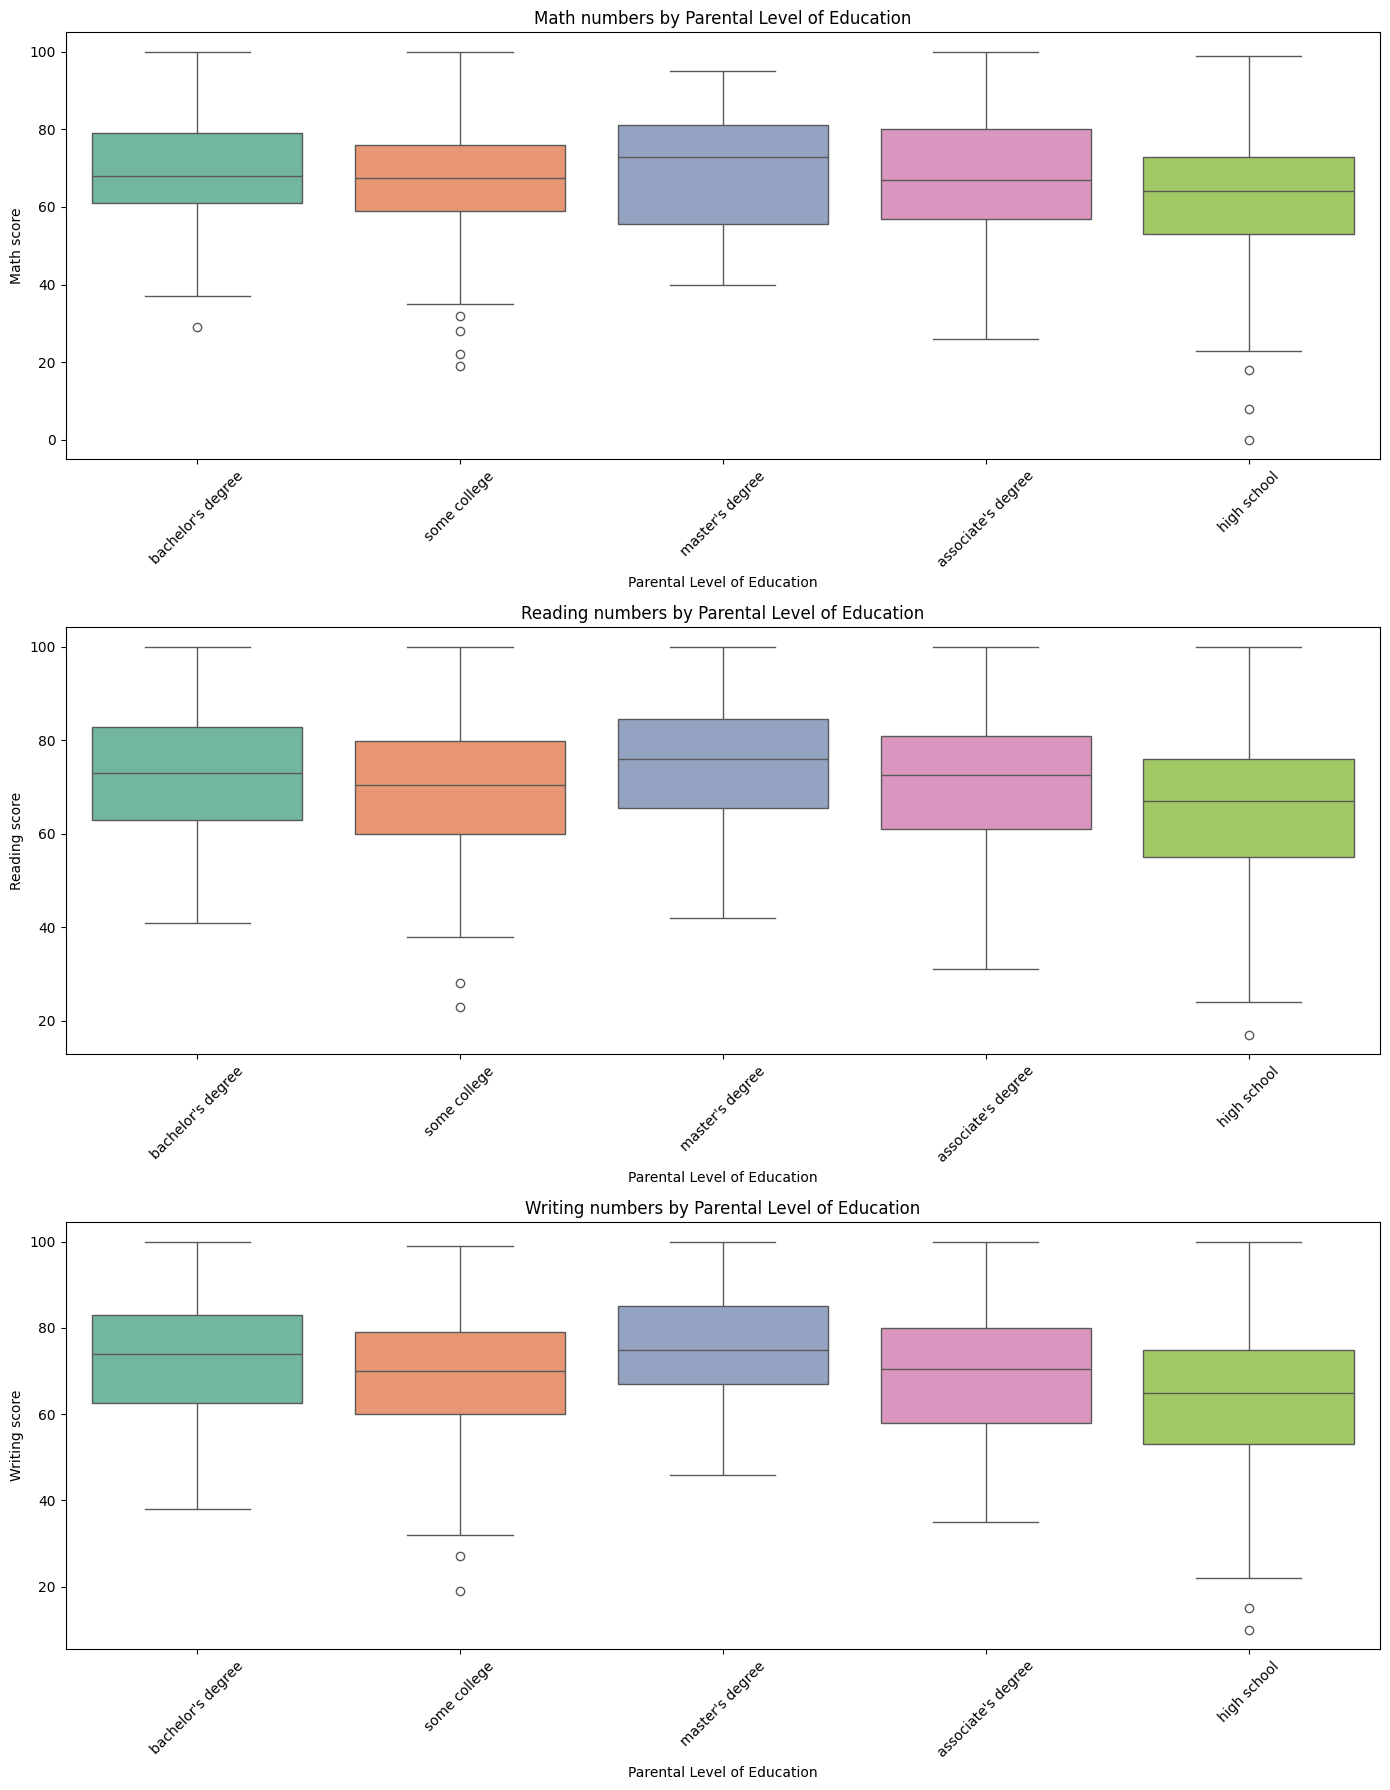

In [116]:
# Multivariate Analysis: Parental Level of Education vs. Scores

# Set up the figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Box plots for scores by parental level of education
score_columns = ['math_score', 'reading_score', 'writing_score']
titles = ['Math numbers by Parental Level of Education', 'Reading numbers by Parental Level of Education', 'Writing numbers by Parental Level of Education']

for i, score in enumerate(score_columns):
    sns.boxplot(x='parental_level_of_education', y=score, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(titles[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_xlabel('Parental Level of Education')
    axes[i].set_ylabel(score.capitalize().replace('_', ' '))

plt.tight_layout()
plt.show()

<center><b>Figure:6</b> - Yes Master's degree holders and associate's degree holders child are batter perfome in every test.</center>

### Q8. Test numbers base on `race/ethnicity`?
### Q9. Can `race/ethnicity` effect on student score?

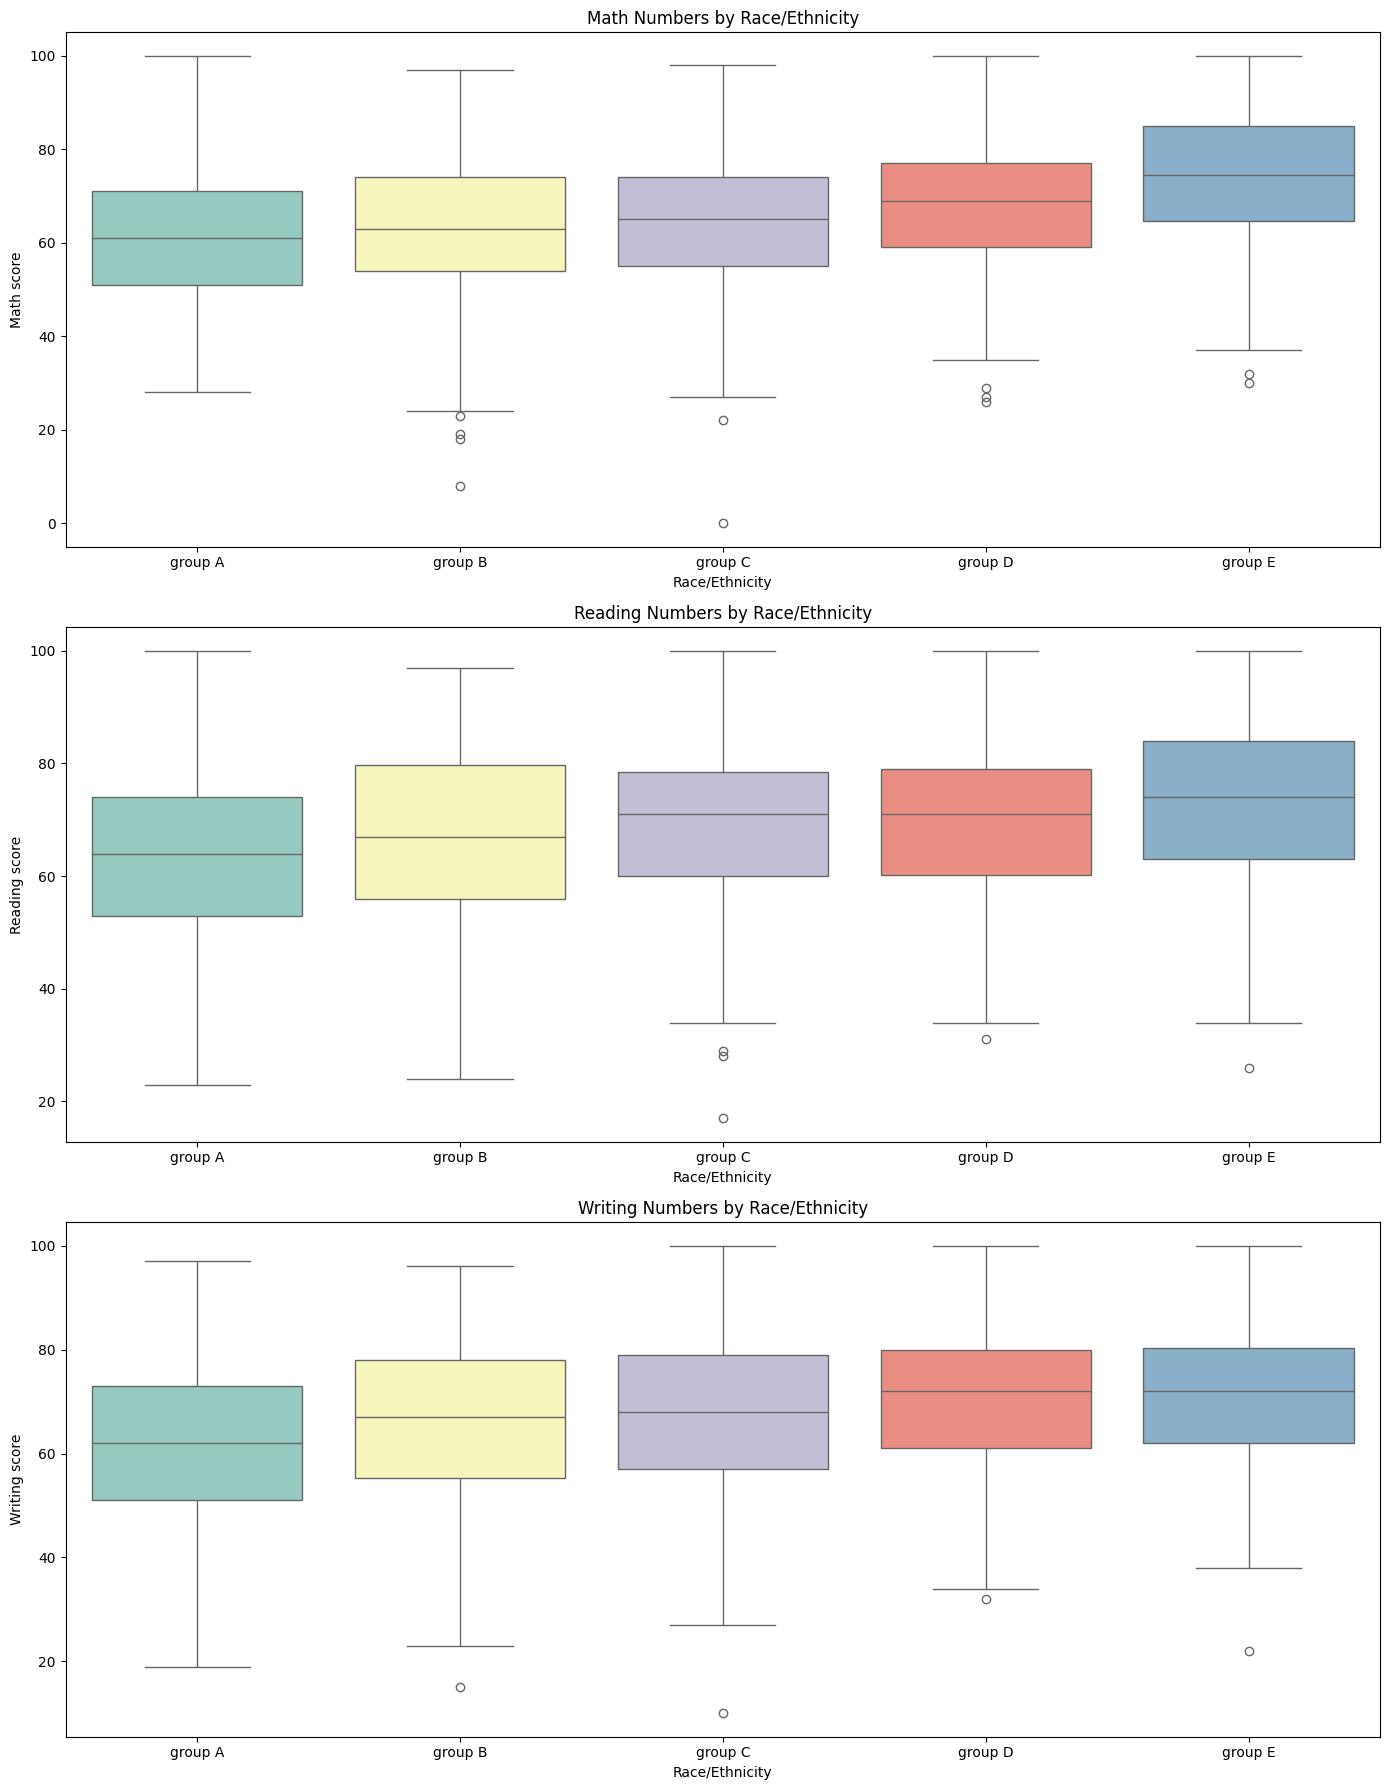

In [117]:
# Set up the figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Box plots for scores by race/ethnicity
score_columns = ['math_score', 'reading_score', 'writing_score']
titles = ['Math Numbers by Race/Ethnicity', 'Reading Numbers by Race/Ethnicity', 'Writing Numbers by Race/Ethnicity']

for i, score in enumerate(score_columns):
    sns.boxplot(x='race_ethnicity', y=score, data=df, ax=axes[i], palette='Set3', order=sorted(df['race_ethnicity'].unique()))
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Race/Ethnicity')
    axes[i].set_ylabel(score.capitalize().replace('_', ' '))

plt.tight_layout()
plt.show()

<center><b>Figure:7</b> - Yes Group A Student are batter perfome in every test.</center>

### Q10. How many student's take full marks, check math, writing and reading test?

In [118]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


### Q11. How many student's take less then 20 marks, check math, writing and reading test?

In [119]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Q12. How many student's take zero  marks, check math, writing and reading test?

In [120]:
reading_zero = df[df['reading_score'] == 0]['average'].count()
writing_zero = df[df['writing_score'] == 0]['average'].count()
math_zero = df[df['math_score'] == 0]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_zero}')
print(f'Number of students with less than 20 marks in Writing: {writing_zero}')
print(f'Number of students with less than 20 marks in Reading: {reading_zero}')

Number of students with less than 20 marks in Maths: 1
Number of students with less than 20 marks in Writing: 0
Number of students with less than 20 marks in Reading: 0


In [121]:
df[df['math_score'] == 0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_number,average
59,female,group C,high school,free/reduced,none,0,17,10,27,9.0


### Q13. Who's take more numbers male or female?

In [122]:
df.groupby('gender')['total_number'].sum()

gender
female    108111
male       95201
Name: total_number, dtype: int64

### Q14. Which group top of the score base on `race_ethnicity`? 

In [123]:
print(df.groupby('race_ethnicity')['total_number'].sum().sort_values(ascending=False))


race_ethnicity
group C    64245
group D    54375
group B    37317
group E    30556
group A    16819
Name: total_number, dtype: int64


### 15. Which group top on average base on `parental_level_of_education`

In [124]:
df.groupby('parental_level_of_education')['average'].mean().sort_values(ascending=False)

parental_level_of_education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
high school           64.056889
Name: average, dtype: float64

# Data Visualization:-

In [125]:
# Create histogram with average scores using plotly library
fig = px.histogram(df, x='average', nbins=30)
fig.show()

<center><b>Figure:8</b> - Histogram of Average Column.</center>

In [126]:
fig = px.histogram(df, x='average', color='gender', nbins=30)
fig.show()

<center><b>Figure:9</b> - Histogram of average column base on gender.</center>

In [127]:
fig = px.histogram(df, x='total_number', nbins=30)
fig.show()

<center><b>Figure:10</b> - Histogram of Total_number Column.</center>

In [128]:
fig = px.histogram(df, x='total_number', color='gender', nbins=30)
fig.show()

<center><b>Figure:11</b> - Histogram of total_number column base on gender.</center>

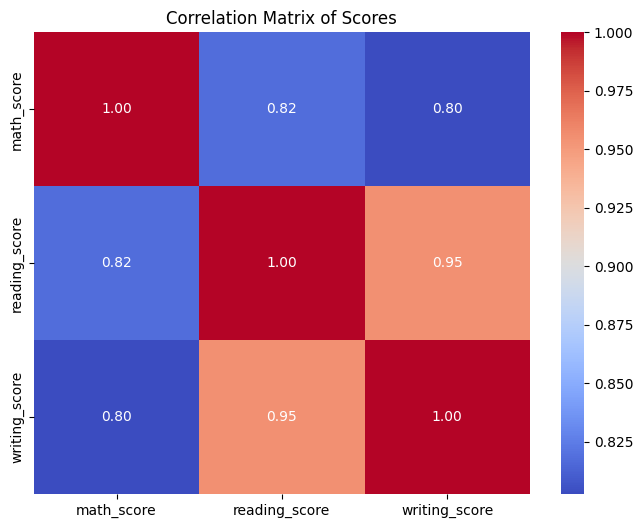

In [129]:
# Compute the correlation matrix for the numerical score variables
correlation_matrix = df[['math_score', 'reading_score', 'writing_score']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()

<center><b>Figure:12</b> - Correlation plot of math_score, reading_score, writing_score.</center>

# Summary:-
- In this data set  approximate male and female are equal.
- Base on  `race_ethnicity` `group c` are top contributer.
- Base on `parental_level_of_education` `high school` are top contributer.
- `Standard group` is highest group base on `lunch`
- `test_preparation_course` most of the student are not Complete
- Those student are on average good prefome these parents have higher education.
- Group A students are on average good perform.
- In math subject 7 students take 100% marks and 1 student Take 0 mark.
- She belongs to `group c` in `rece ethnicity` parental level of education is `high school`
- In Writting subject 14 students take 100% marks.
- In Reading subject 17 students take 100% marks.